# Load the dataset and view it 

In [2]:
import pandas as pd

df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Basic statistics

In [3]:
print(df['math score'].describe())
print(df.gender.count())

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64
1000


# Hypothesis

# Data Cleaning

In [4]:
# check for missing or incorrect values and handle them as needed
df = df.dropna()

# remove duplicates
df = df.drop_duplicates()

df = df[df['parental level of education'].isin(['some high school', 'high school', 'some college', "bachelor's degree", "master's degree"])]

# Exploratory Data Analysis

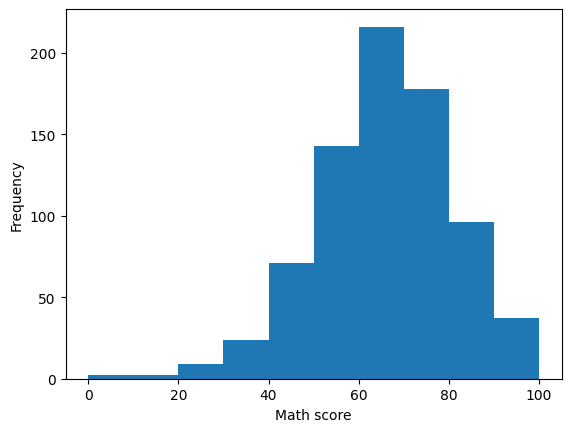

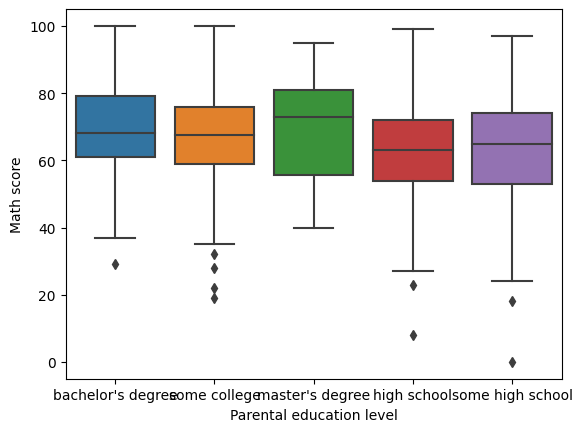

In [35]:
# importing needed libraries
import matplotlib.pyplot as plt
import seaborn as sns

# calculate summary statistics for the math, reading, and writing scores
math_mean = df['math score'].mean()
math_std = df['math score'].std()
reading_mean = df['reading score'].mean()
reading_std = df['reading score'].std()
writing_mean = df['writing score'].mean()
writing_std = df['writing score'].std()

# create a histogram of the math scores using matplotlib
plt.hist(df['math score'])
plt.xlabel('Math score')
plt.ylabel('Frequency')
plt.show()

# create a boxplot of the math scores by parental education level using seaborn
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.xlabel('Parental education level')
plt.ylabel('Math score')
plt.show()

# Dependent variable selection

In [36]:
# extract the columns we need for the analysis
parental_education = df['parental level of education']
math_score = df['math score']
reading_score = df['reading score']
writing_score = df['writing score']

# Regression analysis 

Testing the hypothesis that there is a relationship between parental education level and test performance. We fit a regression model to the data and evaluate its performance to determine the strength and significance of the relationship between the two variables

In [37]:
# importing the required library
import statsmodels.api as sm

# convert the parental education levels to dummy variables
parental_education = pd.get_dummies(parental_education)

# add a constant term to the parental education levels
parental_education = sm.add_constant(parental_education)

# attempt to fit a regression model
model = sm.OLS(math_score,parental_education).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     7.168
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           1.14e-05
Time:                        13:01:11   Log-Likelihood:                -3203.8
No. Observations:                 778   AIC:                             6418.
Df Residuals:                     773   BIC:                             6441.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                55.3165      0.50

In [38]:
# attempt to fit a regression model for reading_score
model = sm.OLS(reading_score,parental_education).fit()

# print the summary of the model to see the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          reading score   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     10.36
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           3.58e-08
Time:                        13:01:11   Log-Likelihood:                -3178.1
No. Observations:                 778   AIC:                             6366.
Df Residuals:                     773   BIC:                             6389.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                58.2459      0.48

In [39]:
# attempt to fit a regression model for writing_score
model = sm.OLS(writing_score,parental_education).fit()

# print the summary of the model to see the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          writing score   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     16.68
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           4.03e-13
Time:                        13:01:11   Log-Likelihood:                -3198.9
No. Observations:                 778   AIC:                             6408.
Df Residuals:                     773   BIC:                             6431.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                57.5395      0.49

# Feature selection

In [40]:
# Feature selection to select the most relevant features (i.e., variables) to include in the regression model

# load the necessary libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# define the input dataframe
X = df.drop('math score', axis=1)

# define the target vector
y = df['math score']

# one-hot encode the input dataframe
onehot_encoder = OneHotEncoder()
X_onehot = onehot_encoder.fit_transform(X)

# retrieve a list of the generated feature names
all_features = onehot_encoder.get_feature_names_out()

# create a SelectKBest object with the mutual_info_regression scoring function
selector = SelectKBest(mutual_info_regression, k=10)

# fit the selector to the data and return the selected features
X_new = selector.fit_transform(X_onehot, y)

# retrieve the names of the selected features
selected_features = all_features[selector.get_support()]

# Classification

In [41]:
# performing operations on selected features to make it easier to do classification
features = []
for feature in selected_features:
  feature = feature.split("_")
  feature = feature[0]
  features.append(feature)

features = list(set(features)) 

In [42]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define the input dataframe
X = df[features].copy()

# Define the target vector
y = df['writing score']

# One-hot encode the input dataframe
onehot_encoder = OneHotEncoder()
X_onehot = onehot_encoder.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_onehot, y, test_size=0.2)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f'Model accuracy: {accuracy * 100:.2f}%')

Model accuracy: 97.44%


In [43]:
# Define the target vector
y = df['reading score']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_onehot, y, test_size=0.2)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f'Model accuracy: {accuracy * 100:.2f}%')

Model accuracy: 92.31%


In [45]:
# import the required library
import numpy as np

# define a binary target variable by grouping students into two categories based on their math scores
df['math_performance'] = (np.where(df['math score'] > df['math score'].median(), 'high', 'low')).copy()

# define the input dataframe
X = df[features]

# define the target vector
y = df['math_performance']

# one-hot encode the input dataframe
onehot_encoder = OneHotEncoder()
X_onehot = onehot_encoder.fit_transform(X)

# create a binary classification model
model = LogisticRegression()

# fit the model to the data
model.fit(X_onehot, y)

# evaluate the model
accuracy = model.score(X_onehot, y)
print(f'Model accuracy: {accuracy * 100:.2f}%')

Model accuracy: 81.11%


# Conclusion